### Importing the Libraries

In [1]:
#Imports
import random
import os
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import numpy as np

### Download the dataset

In [2]:
#Download the Tiny Image Net dataset => http://cs231n.stanford.edu/tiny-imagenet-200.zip
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2019-08-29 05:24:08--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  88.6MB/s    in 2.7s    

2019-08-29 05:24:10 (88.6 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [3]:
#Extract the dataset
!unzip tiny-imagenet-200.zip

Archive:  tiny-imagenet-200.zip
   creating: tiny-imagenet-200/
  inflating: tiny-imagenet-200/words.txt  
  inflating: tiny-imagenet-200/wnids.txt  
   creating: tiny-imagenet-200/test/
   creating: tiny-imagenet-200/test/images/
  inflating: tiny-imagenet-200/test/images/test_1860.JPEG  
  inflating: tiny-imagenet-200/test/images/test_613.JPEG  
  inflating: tiny-imagenet-200/test/images/test_6272.JPEG  
  inflating: tiny-imagenet-200/test/images/test_2289.JPEG  
  inflating: tiny-imagenet-200/test/images/test_3408.JPEG  
  inflating: tiny-imagenet-200/test/images/test_1693.JPEG  
  inflating: tiny-imagenet-200/test/images/test_389.JPEG  
  inflating: tiny-imagenet-200/test/images/test_2944.JPEG  
  inflating: tiny-imagenet-200/test/images/test_1275.JPEG  
  inflating: tiny-imagenet-200/test/images/test_8104.JPEG  
  inflating: tiny-imagenet-200/test/images/test_2351.JPEG  
  inflating: tiny-imagenet-200/test/images/test_678.JPEG  
  inflating: tiny-imagenet-200/test/images/test_3076

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_366.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_209.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_425.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_478.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_464.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_37.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_403.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_27.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_402.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_158.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_426.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_244.JPEG  
  inflating: tiny-imagenet-200/train/n02395406/images/n02395406_353.JPEG  
  inflating: tiny-imagenet

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_47.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_157.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_239.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_441.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_137.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_200.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_62.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_241.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_30.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_43.JPEG  
 extracting: tiny-imagenet-200/train/n04596742/images/n04596742_309.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_399.JPEG  
  inflating: tiny-imagenet-200/train/n04596742/images/n04596742_304.JPEG  
  inflating: tiny-imagenet-20

In [4]:
!ls tiny-imagenet-200

test  train  val  wnids.txt  words.txt


### Data Prepration Stage 1: Taking 100 random image names from each of the 200 classes

In [5]:
#Taking 100 random image names from each of the 200 classes. Totalling 20000 images.
image_folders_ = os.listdir("tiny-imagenet-200/train/")
rand_image_paths_ = []
for folder in image_folders_:
    path = "tiny-imagenet-200/train/"+folder+"/images/"
    filenames_ = os.listdir(path)
    random_files_ = [path+name for name in random.sample(filenames_,100)]
    rand_image_paths_.extend(random_files_)

#Create folders if they don't exist
os.mkdir("raw_data") if not os.path.isdir("raw_data") else None
os.mkdir("raw_data/angle0") if not os.path.isdir("raw_data/angle0") else None
os.mkdir("raw_data/angle90") if not os.path.isdir("raw_data/angle90") else None
os.mkdir("raw_data/angle180") if not os.path.isdir("raw_data/angle180") else None
os.mkdir("raw_data/angle270") if not os.path.isdir("raw_data/angle270") else None

#Copy these 20000 files to the raw_data folder present at root
for image in tqdm(rand_image_paths_):
    shutil.copy(image,"raw_data/angle0/")

100%|██████████| 20000/20000 [00:01<00:00, 14358.77it/s]


### Utility functions for data pre-processing

In [6]:
#Utility function to display images
def display_images(image_dir,filenames):
    plt.figure(figsize=(15,15))
    for i in range(1,len(filenames)):
        row = i
        image = Image.open(image_dir+filenames[i])
        plt.subplot(4,4,row)
        plt.imshow(image)
    plt.show()
    
#Utility function to rotate an image by a certain degree and save them
def rotate_and_save(image_names,angle):
    for filename in tqdm(image_names):
        image=Image.open(filename)
        if(angle==90):
            rotated=image.transpose(Image.ROTATE_90)
        elif(angle==180):
            rotated=image.transpose(Image.ROTATE_180)
        else:
            rotated=image.transpose(Image.ROTATE_270)
        rotated.save("raw_data/angle{}/".format(angle)+filename.split("/")[-1])

#Split the data into train, validation and test dataset. 15000 for train. 5000 for validation. 5000 for test.
def create_split(source,destination,angle):
    filenames=os.listdir("raw_data/angle0/")
    train_files = filenames[:10000]
    validation_files = filenames[10000:15000]
    test_files = filenames[15000:]

    train_files = [source+"angle{}/".format(angle)+i for i in train_files]
    for file in train_files:
        shutil.copy(file,destination+"/train/angle{}/".format(angle))         #"data/angle0/train/"
    print("Train data created for Angle {} images...".format(angle))
    
    validation_files = [source+"angle{}/".format(angle)+i for i in validation_files]
    for file in validation_files:
        shutil.copy(file,destination+"/validation/angle{}/".format(angle))         #"data/angle0/train/"
    print("Validation data created for Angle {} images...".format(angle))
    
    test_files = [source+"angle{}/".format(angle)+i for i in test_files]
    for file in test_files:
        shutil.copy(file,destination+"/test/angle{}/".format(angle))         
    print("Test data created for Angle {} images...\n".format(angle))

### Data preparation Stage 2: Generating images with rotations 90, 180 and 270 degree

In [7]:
names_0=["raw_data/angle0/"+filename for filename in os.listdir("raw_data/angle0/")]

#Rotate images by 90 degree and save them in folder data/angle90
rotate_and_save(names_0,90)

#Rotate images by 180 degree and save them in folder data/angle180
rotate_and_save(names_0,180)

#Rotate images by 270 degree and save them in folder data/angle270
rotate_and_save(names_0,270)

100%|██████████| 20000/20000 [00:12<00:00, 1609.86it/s]


### Data preparation Stage 3: Creating train, validation and test datasets

In [8]:
source="raw_data/"
destination="data/"

#We will check if the folder 'data','train','test','validation' exists. 
#If not, we will create a folder with the same name
os.mkdir(destination) if not os.path.isdir(destination) else None
os.mkdir(destination+"/train") if not os.path.isdir(destination+"/train") else None
os.mkdir(destination+"/validation") if not os.path.isdir(destination+"/validation") else None
os.mkdir(destination+"/test") if not os.path.isdir(destination+"/test") else None

#We will check if the folder 'angle0','angle90','angle180','angle270' exists. 
#If not, we will create a folder with the same name
os.mkdir(destination) if not os.path.isdir(destination) else None
os.mkdir(destination+"/train/angle0/") if not os.path.isdir(destination+"/train/angle0/") else None
os.mkdir(destination+"/validation/angle0/") if not os.path.isdir(destination+"/validation/angle0/") else None
os.mkdir(destination+"/test/angle0/") if not os.path.isdir(destination+"/test/angle0/") else None

os.mkdir(destination) if not os.path.isdir(destination) else None
os.mkdir(destination+"/train/angle90/") if not os.path.isdir(destination+"/train/angle90/") else None
os.mkdir(destination+"/validation/angle90/") if not os.path.isdir(destination+"/validation/angle90/") else None
os.mkdir(destination+"/test/angle90/") if not os.path.isdir(destination+"/test/angle90/") else None

os.mkdir(destination) if not os.path.isdir(destination) else None
os.mkdir(destination+"/train/angle180/") if not os.path.isdir(destination+"/train/angle180/") else None
os.mkdir(destination+"/validation/angle180/") if not os.path.isdir(destination+"/validation/angle180/") else None
os.mkdir(destination+"/test/angle180/") if not os.path.isdir(destination+"/test/angle180/") else None

os.mkdir(destination) if not os.path.isdir(destination) else None
os.mkdir(destination+"/train/angle270/") if not os.path.isdir(destination+"/train/angle270/") else None
os.mkdir(destination+"/validation/angle270/") if not os.path.isdir(destination+"/validation/angle270/") else None
os.mkdir(destination+"/test/angle270/") if not os.path.isdir(destination+"/test/angle270/") else None

In [9]:
create_split(source,destination,0)
create_split(source,destination,90)
create_split(source,destination,180)
create_split(source,destination,270)

Train data created for Angle 0 images...
Validation data created for Angle 0 images...
Test data created for Angle 0 images...

Train data created for Angle 90 images...
Validation data created for Angle 90 images...
Test data created for Angle 90 images...

Train data created for Angle 180 images...
Validation data created for Angle 180 images...
Test data created for Angle 180 images...

Train data created for Angle 270 images...
Validation data created for Angle 270 images...
Test data created for Angle 270 images...



### Display random images from the train set for all the 4 classes

In [10]:
filenames_ = random.sample(os.listdir("data/train/angle0/"),17)

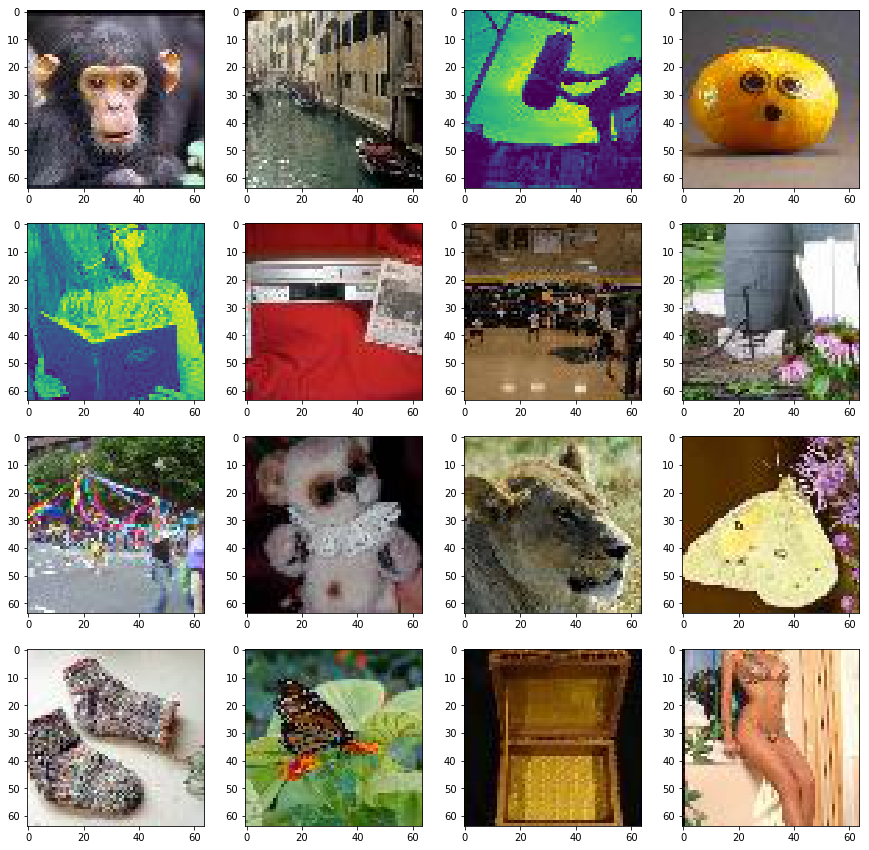

In [11]:
#Display some sample images from the 0 degree data 
image_dir = "data/train/angle0/"
display_images(image_dir,filenames_)

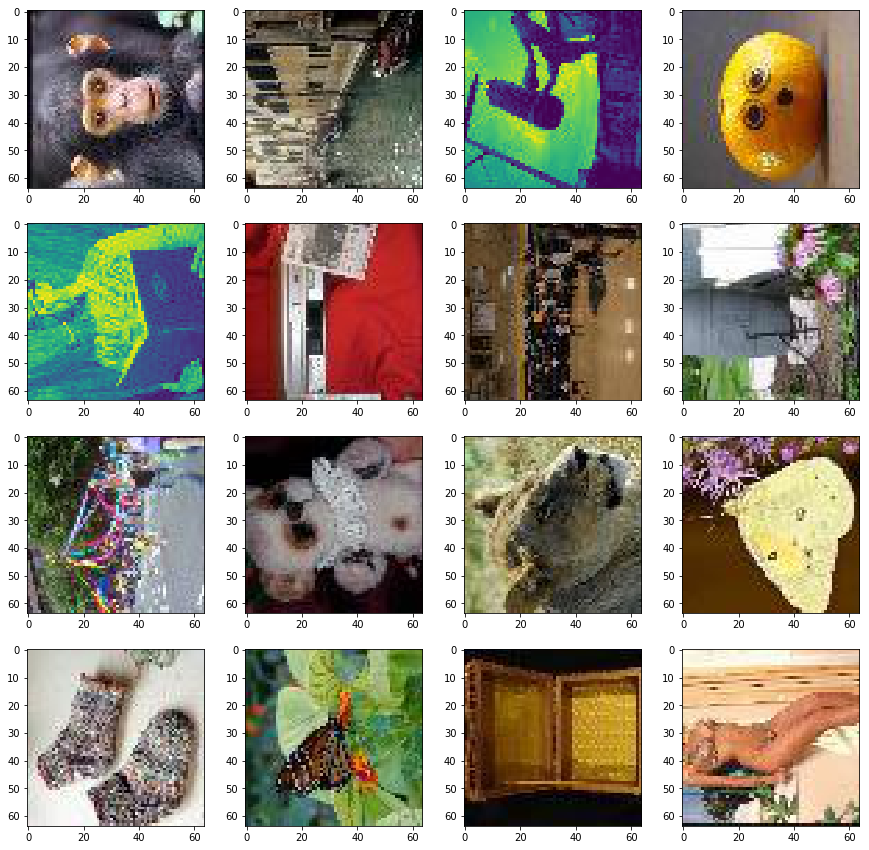

In [12]:
#Display some sample images from the 90 degree data 
image_dir = "data/train/angle90/"
display_images(image_dir,filenames_)

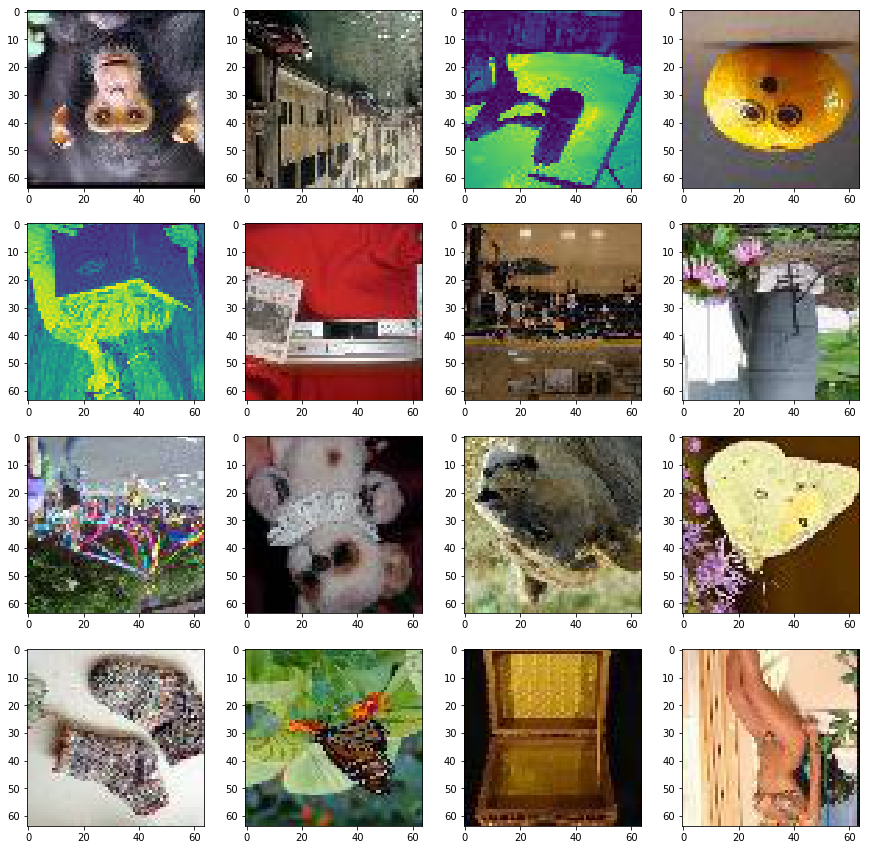

In [13]:
#Display some sample images from the 180 degree data 
image_dir = "data/train/angle180/"
display_images(image_dir,filenames_)

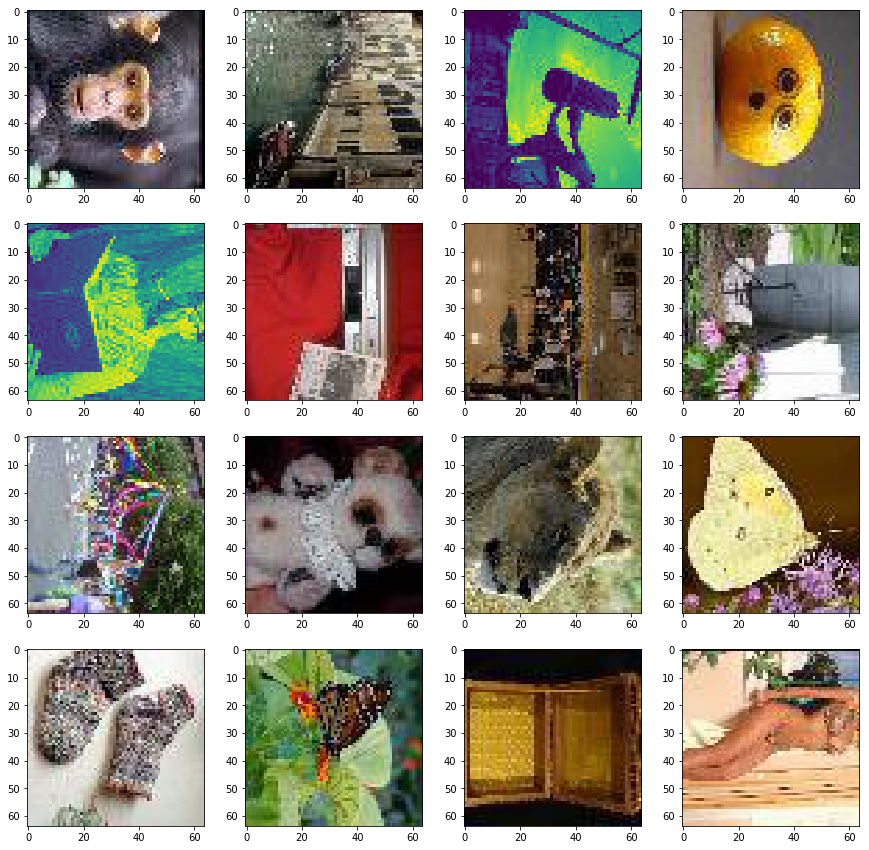

In [14]:
#Display some sample images from the 270 degree data 
image_dir = "data/train/angle270/"
display_images(image_dir,filenames_)

### Importing libraries for deep learning

In [2]:
#Import the deep learning libraries
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.optimizers import RMSprop
from keras import regularizers as reg
from keras.models import Model
from keras import optimizers
from keras.callbacks import History
from keras.applications import inception_v3, resnet50

Using TensorFlow backend.


### Utility functions for the deep learning model

In [3]:
#This function is used to plot/update the train and test loss after all epochs
def plt_train_val_loss(x, val_loss, train_loss, colors=['b']):
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(x, val_loss, 'b', label="Validation Loss")
    plt.plot(x, train_loss, 'r', label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy Loss")
    plt.legend()

#Calculate minimum difference between two angles.
def angle_difference(x, y):
    return 180 - abs(abs(x - y) - 180)


#Calculate the mean diference between the true angles and the predicted angles. 
#Each angle is represented as a binary vector.
def angle_error(y_true, y_pred):
    diff = angle_difference(K.argmax(y_true), K.argmax(y_pred))
    return K.mean(K.cast(K.abs(diff), K.floatx()))

### Creating deep learning architectures

In [10]:
#Model parameters
classes=4
epochs=50
batch_size=50

#Save the trained models to this folder
os.mkdir("trained_models/") if not os.path.isdir("trained_models/") else None

#ImageNet image dimensions
input_dim = (224, 224, 3)

#Load the Convolution base
resnet_50 = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=input_dim)

#Get the pre trained inputs
input_layer=resnet_50.input

#Get the output of the final layer, flattent it and apply activation layer
x = resnet_50.output
x = Flatten(name="flatten")(x)
output_layer = Dense(classes, activation='softmax', name='output_layer')(x)

#Create model
model = Model(inputs=input_layer, outputs=output_layer)

#Compile the final model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=[angle_error,'accuracy'])

#Display model summary
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
#Define custom callbacks
filepath="trained_models/resnet50.h5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_angle_error', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

reduce_learning_rate = ReduceLROnPlateau(monitor='val_angle_error', patience=5)
early_stop = EarlyStopping(monitor='val_angle_error', patience=5)

In [14]:
#We will use the below code snippet for aumenting the training data
train_datagen = ImageDataGenerator(rescale=1./255)

#Only rescale the test images, no augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

nb_train_samples = 40000
nb_validation_samples = 20000

train_generator = train_datagen.flow_from_directory("data/train/",
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory("data/validation/",
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    callbacks=[checkpoint,reduce_learning_rate,early_stop])

Found 40000 images belonging to 4 classes.
Found 20000 images belonging to 4 classes.
Epoch 1/50
800/800 [==============================] - 197s 246ms/step - loss: 1.5744 - angle_error: 0.9665 - acc: 0.4158 - val_loss: 1.3019 - val_angle_error: 1.1616 - val_acc: 0.3817

Epoch 00001: val_angle_error improved from inf to 1.16160, saving model to trained_models/resnet50.h5
Epoch 2/50
800/800 [==============================] - 200s 250ms/step - loss: 1.5532 - angle_error: 0.9581 - acc: 0.4217 - val_loss: 5.2858 - val_angle_error: 0.9784 - val_acc: 0.3431

Epoch 00002: val_angle_error improved from 1.16160 to 0.97840, saving model to trained_models/resnet50.h5
Epoch 3/50
800/800 [==============================] - 200s 250ms/step - loss: 1.5268 - angle_error: 0.9496 - acc: 0.4282 - val_loss: 1.2988 - val_angle_error: 0.9612 - val_acc: 0.4249

Epoch 00003: val_angle_error improved from 0.97840 to 0.96120, saving model to trained_models/resnet50.h5
Epoch 4/50
800/800 [=========================